You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.


1. Data Analysis:
a. Import the dataset
b. Get information about the dataset (mean, max, min, quartiles etc.)
c. Find the correlation between all fields


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
hd=pd.read_csv("heart_disease.csv")
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
hd.shape

(303, 14)

In [18]:
hd.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
hd.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


2. Data Visualization:
a. Visualize the number of patients having a heart disease and not having
a heart disease
b. Visualize the age and whether a patient has disease or not
c. Visualize correlation between all features using a heat map

In [19]:
countNoDisease = len(hd[hd.target == 0])
countHaveDisease = len(hd[hd.target == 1])
print("No:of Patients Haven't Heart Disease:",countNoDisease )
print("No:of Patients Have Heart Disease:",countHaveDisease )

No:of Patients Haven't Heart Disease: 138
No:of Patients Have Heart Disease: 165


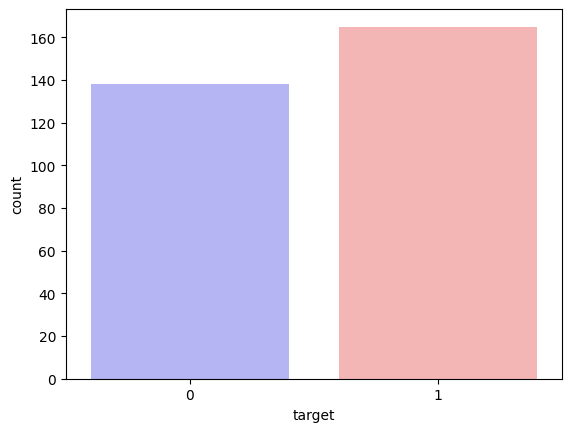

In [24]:
import seaborn as sns
sns.countplot(x="target", data=hd, palette="bwr")
plt.show()


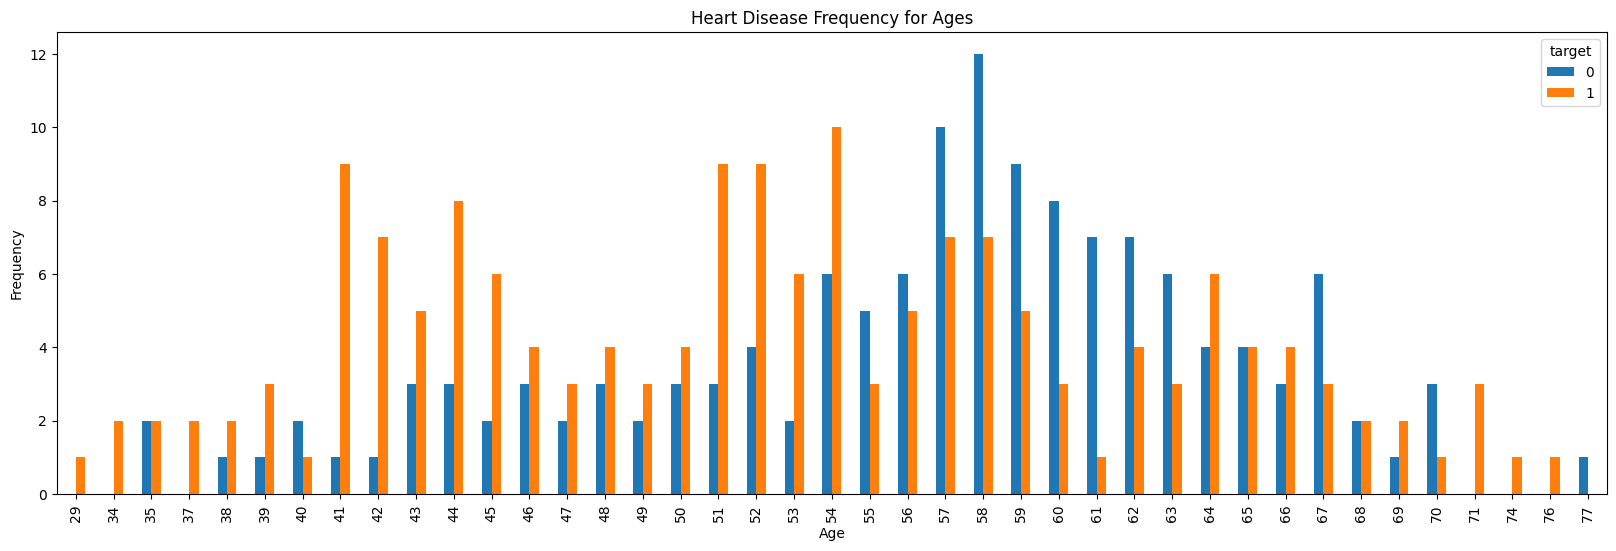

In [26]:
pd.crosstab(hd.age,hd.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: >

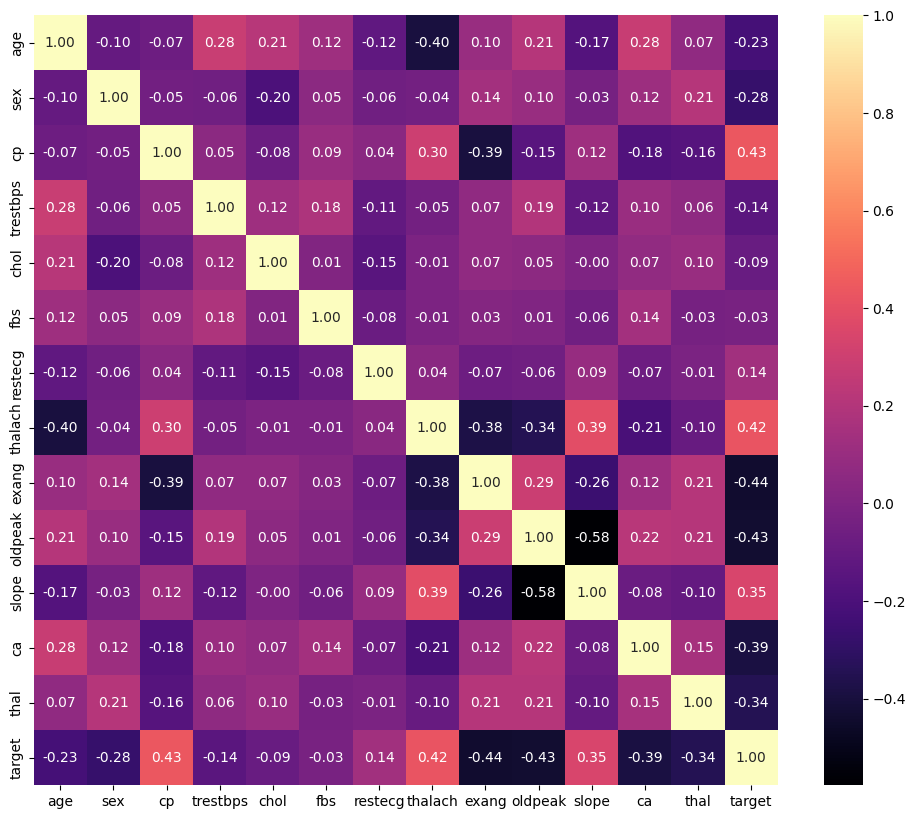

In [9]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(hd.corr(),annot=True,cmap="magma",fmt='.2f')

3. Logistic Regression:
a. Build a simple logistic regression model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and get the accuracy score

In [27]:
x= hd.drop(['target'], axis = 1)
y=hd['target']

In [29]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [31]:
#Logistic Regresssion
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
y_predlr = log_model.predict(x_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test, y_predlr))
print(classification_report(y_test, y_predlr))
print(accuracy_score(y_test, y_predlr))

[[33 11]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

0.8131868131868132


4. Decision Tree:
a. Build a decision tree model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the decision tree using the Graphviz package


In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [45]:
y_preddt = classifier.predict(x_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(classification_report(y_test, y_preddt))
print(confusion_matrix(y_test, y_preddt))
print(accuracy_score(y_test, y_preddt))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74        44
           1       0.76      0.74      0.75        47

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91

[[33 11]
 [12 35]]
0.7472527472527473


In [39]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier()

In [42]:
y_predrf=clf.predict(x_test)

In [43]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_predrf))

Accuracy: 0.8461538461538461


In [50]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_predlr)
cm_dtc = confusion_matrix(y_test,y_preddt)
cm_rf = confusion_matrix(y_test,y_predrf)

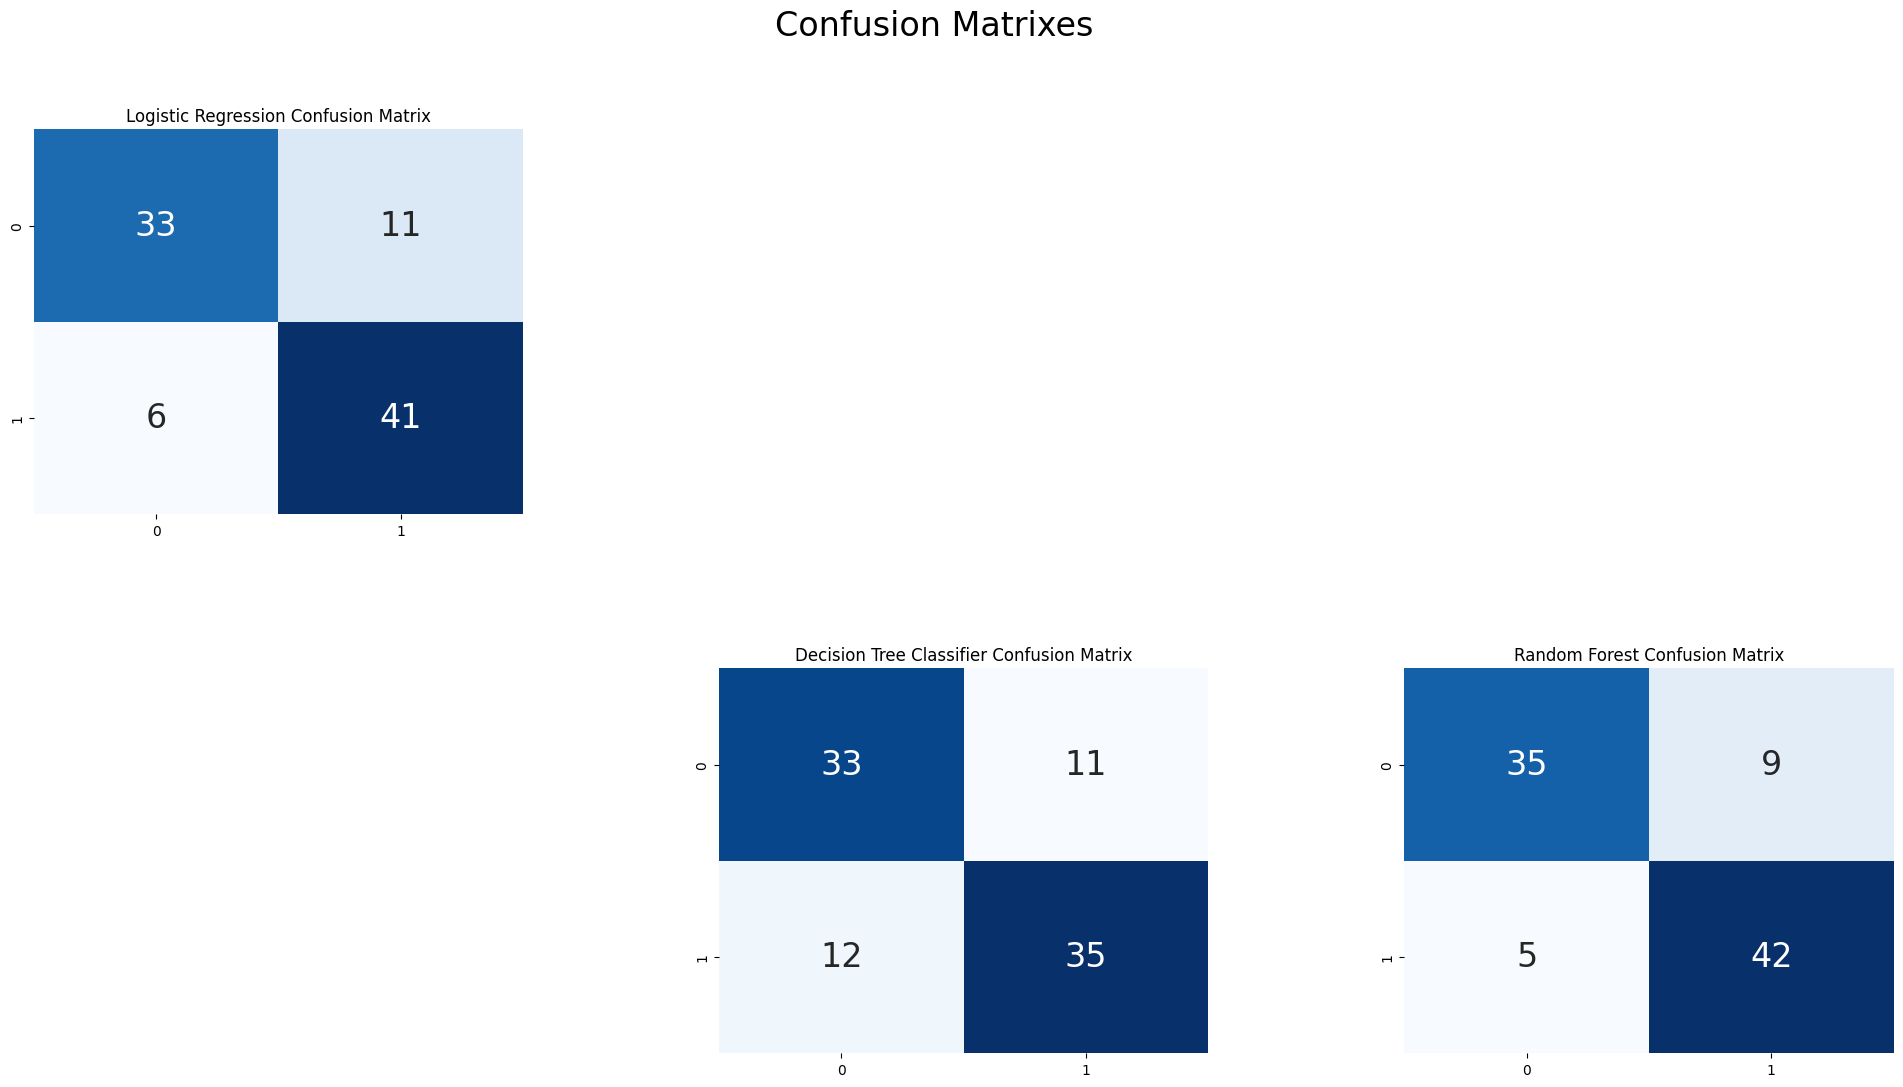

In [51]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

In [ ]:
#Random Forest is the best model based on the accuracy
#Accuracy of the random forest is 84.61%